**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# TRABAJO PRÁCTICO ENTREGABLE - PARTE I

## INTEGRANTES DEL GRUPO IV:
*   María Belén Acotto
*   Elías Ferreyra
*   Juan Ignacio Barrionuevo Galtier
*   Oscar Alejandro Oviedo
*   Gonzalo Heredia Edelstein

---

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [2]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df_origin = pd.read_csv('datasets/melb_df_firt_part.csv')
melb_df_origin[:3]

,Suburb,Rooms,Type,Price,Date,Distance,Bathroom,Car,CouncilArea,Postcode,Lattitude,Longtitude,Landsize,BuildingArea,YearBuilt,Regionname,AgeRange,price_mean_city
0,Abbotsford,2,h,1480000.0,2016-03-12,2.5,1.0,1.0,Yarra,3067,-37.7996,144.9984,202.0,NaN,NaN,North,S/D,121.34
1,Abbotsford,2,h,1035000.0,2016-04-02,2.5,1.0,0.0,Yarra,3067,-37.8079,144.9934,156.0,79.0,1900.0,North,[>70),121.34
2,Abbotsford,3,h,1465000.0,2017-04-03,2.5,2.0,0.0,Yarra,3067,-37.8093,144.9944,134.0,150.0,1900.0,North,[>70),121.34


In [3]:
melb_df_origin.shape

(12956, 18)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.

### Selección de columnas

In [4]:
melb_df = melb_df_origin.copy()
melb_df.head()

,Suburb,Rooms,Type,Price,Date,Distance,Bathroom,Car,CouncilArea,Postcode,Lattitude,Longtitude,Landsize,BuildingArea,YearBuilt,Regionname,AgeRange,price_mean_city
0,Abbotsford,2,h,1480000.0,2016-03-12,2.5,1.0,1.0,Yarra,3067,-37.7996,144.9984,202.0,NaN,NaN,North,S/D,121.34
1,Abbotsford,2,h,1035000.0,2016-04-02,2.5,1.0,0.0,Yarra,3067,-37.8079,144.9934,156.0,79.0,1900.0,North,[>70),121.34
2,Abbotsford,3,h,1465000.0,2017-04-03,2.5,2.0,0.0,Yarra,3067,-37.8093,144.9944,134.0,150.0,1900.0,North,[>70),121.34
3,Abbotsford,3,h,850000.0,2017-04-03,2.5,2.0,1.0,Yarra,3067,-37.7969,144.9969,94.0,NaN,NaN,North,S/D,121.34
4,Abbotsford,4,h,1600000.0,2016-04-06,2.5,1.0,2.0,Yarra,3067,-37.8072,144.9941,120.0,142.0,2014.0,North,[0-5),121.34


In [5]:
melb_df.drop(columns=['BuildingArea', 'YearBuilt'], inplace=True)

Llegados a este punto, concluimos que por la cantidad de valores y distribución en las columnas **Lattitude** y **Longtitude**, y por los valores conceptuales de las variables, las mismas no las usaremos dentro de nuestro análisis. Se volverán a agregar si fuesen necesarias.

In [6]:
melb_df.drop(columns=['Lattitude', 'Longtitude'], inplace=True)

In [7]:
melb_df.shape

(12956, 14)

### One-Hot Encoding

#### Rápido Análisis

In [8]:
melb_df.nunique()

Suburb              314
Rooms                 9
Type                  3
Price              1945
Date                 58
Distance            202
Bathroom              8
Car                  11
CouncilArea          33
Postcode            198
Landsize           1398
Regionname            4
AgeRange             16
price_mean_city      31
dtype: int64

In [9]:
melb_df.isna().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Date               0
Distance           0
Bathroom           0
Car                0
CouncilArea        0
Postcode           0
Landsize           0
Regionname         0
AgeRange           0
price_mean_city    0
dtype: int64

In [10]:
melb_df.columns.values

array(['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 'Bathroom',
       'Car', 'CouncilArea', 'Postcode', 'Landsize', 'Regionname',
       'AgeRange', 'price_mean_city'], dtype=object)

#### Re-Agrupaciones

Como decidimos dejar la columna **Date**, la agruparemos para mostrar simplemente la fecha de venta pero dividido trimestralmente.

In [11]:
#df['quarter'] = pd.PeriodIndex(df.date, freq='Q')
melb_df['Date_Quarter'] = pd.PeriodIndex(melb_df.Date, freq='Q')
melb_df.Date_Quarter.unique()

<PeriodArray>
['2016Q1', '2016Q2', '2017Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q3',
 '2017Q4']
Length: 8, dtype: period[Q-DEC]

Quedandonos con 8 categorías, borraremos la columna **Date**

In [12]:
melb_df.drop(columns=['Date'], inplace=True)
melb_df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Postcode,Landsize,Regionname,AgeRange,price_mean_city,Date_Quarter
0,Abbotsford,2,h,1480000.0,2.5,1.0,1.0,Yarra,3067,202.0,North,S/D,121.34,2016Q1
1,Abbotsford,2,h,1035000.0,2.5,1.0,0.0,Yarra,3067,156.0,North,[>70),121.34,2016Q2
2,Abbotsford,3,h,1465000.0,2.5,2.0,0.0,Yarra,3067,134.0,North,[>70),121.34,2017Q2
3,Abbotsford,3,h,850000.0,2.5,2.0,1.0,Yarra,3067,94.0,North,S/D,121.34,2017Q2
4,Abbotsford,4,h,1600000.0,2.5,1.0,2.0,Yarra,3067,120.0,North,[0-5),121.34,2016Q2


Dejaremos el resto de columnas como están, por el momento.

#### Encoding

Primero tomaremos aquellas variables categóricas y las numéricas

In [13]:
melb_df.columns.values

array(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Bathroom', 'Car',
       'CouncilArea', 'Postcode', 'Landsize', 'Regionname', 'AgeRange',
       'price_mean_city', 'Date_Quarter'], dtype=object)

In [14]:
categorical_cols = ['Suburb', 'Type', 'CouncilArea', 'Postcode', 'Regionname', 'Date_Quarter', 'AgeRange']
numerical_cols = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'price_mean_city', 'Price']

Aplicamos OneHotEncoder sobre las variables categóricas

In [15]:
from sklearn.preprocessing import OneHotEncoder

new_cat_cols = []

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
    for col_value in col_values:
        new_cat_cols.append('{}={}'.format(col, col_value))
# Hacemos un DataFrame con las columnas encodeadas
df_cat_enc = pd.DataFrame(X, columns = new_cat_cols)

Unimos datasets en uno solo

In [16]:
melb_df_enc = np.hstack([df_cat_enc,melb_df[numerical_cols]])
df_cat_enc = np.hstack([new_cat_cols,numerical_cols])

In [17]:
melb_df_enc.shape

(12956, 583)

In [18]:
melb_df_enc_f = pd.DataFrame(melb_df_enc, columns=df_cat_enc)
melb_df_enc_f.head()

,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,...,AgeRange=[60-65),AgeRange=[65-70),AgeRange=[>70),Rooms,Distance,Bathroom,Car,Landsize,price_mean_city,Price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.5,1.0,1.0,202.0,121.34,1480000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2.5,1.0,0.0,156.0,121.34,1035000.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,2.5,2.0,0.0,134.0,121.34,1465000.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.5,2.0,1.0,94.0,121.34,850000.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,2.5,1.0,2.0,120.0,121.34,1600000.0


---

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

Tener en cuenta que:
* Para la aplicación de KNN Regressor, no se necesita tener conjuntos de train y test.
* Los algorítmos de aprendizaje automático, en su mayoría, sólo pueden funcionar con valores numéricos.
* Cuando tenemos columnas con valores muy altos y otroas con valores muy bajos, conviene escalar los datos.

### Agregación YearBuilt y BuildingArea

In [19]:
melb_df_enc_f.shape

(12956, 583)

In [20]:
cols_add = ['YearBuilt', 'BuildingArea']
cols_melb_df = melb_df_enc_f.columns.values

melb_df_knn = np.hstack([melb_df_enc_f, melb_df_origin[cols_add]])
cols_df_knn = np.hstack([cols_melb_df, cols_add])

melb_df_knn_f = pd.DataFrame(melb_df_knn, columns=cols_df_knn)
melb_df_knn_f.head()

,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,...,AgeRange=[>70),Rooms,Distance,Bathroom,Car,Landsize,price_mean_city,Price,YearBuilt,BuildingArea
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.5,1.0,1.0,202.0,121.34,1480000.0,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.5,1.0,0.0,156.0,121.34,1035000.0,1900.0,79.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.5,2.0,0.0,134.0,121.34,1465000.0,1900.0,150.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.5,2.0,1.0,94.0,121.34,850000.0,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,2.5,1.0,2.0,120.0,121.34,1600000.0,2014.0,142.0


In [21]:
melb_df_knn_f.shape

(12956, 585)

### Escalado de datos

Escalamos las columnas numéricas, ya que KNN funciona mejor con valores en una misma escala. 

In [22]:
cols = numerical_cols.copy()
cols.extend(cols_add)
melb_df_knn_f2 = melb_df_knn_f[cols].copy()

In [23]:
from sklearn.preprocessing import StandardScaler

scaler_knn = StandardScaler()
melb_knn_sca = scaler_knn.fit_transform(melb_df_knn_f2)
melb_df_knn_sca = pd.DataFrame(melb_knn_sca, columns=melb_df_knn_f2.columns.values)
melb_df_knn_sca

,Rooms,Distance,Bathroom,Car,Landsize,price_mean_city,Price,YearBuilt,BuildingArea
0,-0.953310,-1.302287,-0.761066,-0.613287,-0.210337,1.191846,1.100977,NaN,NaN
1,-0.953310,-1.302287,-0.761066,-1.672578,-0.241041,1.191846,0.118436,-1.799241,-0.119382
2,0.124540,-1.302287,0.803824,-1.672578,-0.255726,1.191846,1.067857,-1.799241,0.009049
3,0.124540,-1.302287,0.803824,-0.613287,-0.282426,1.191846,-0.290035,NaN,NaN
4,1.202391,-1.302287,-0.761066,0.446005,-0.265071,1.191846,1.365931,1.319544,-0.005422
...,...,...,...,...,...,...,...,...,...
12951,0.124540,1.052706,0.803824,0.446005,0.059997,-0.751441,-0.753706,NaN,NaN
12952,0.124540,5.712226,-0.761066,-0.613287,-0.010089,1.191846,-1.358686,0.334664,-0.123000
12953,2.280241,6.368260,2.368714,3.623879,29.358177,1.191846,0.824982,NaN,80.260642
12954,1.202391,2.280666,0.803824,0.446005,-0.026777,-0.790151,-0.785721,1.264828,0.059698


In [24]:
melb_df_knn_sca.shape

(12956, 9)

In [25]:
melb_df_knn_sca[['YearBuilt','BuildingArea']].isna().sum()

YearBuilt       5158
BuildingArea    6190
dtype: int64

### Aplicación de Imputación por KNN

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df_knn_sca.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor()) #Estima por el algoritmo de KNN
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])
melb_data_mice

C:\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,Rooms,Distance,Bathroom,Car,Landsize,price_mean_city,Price,YearBuilt,BuildingArea
0,-0.953310,-1.302287,-0.761066,-0.613287,-0.210337,1.191846,1.100977,0.159575,0.074169
1,-0.953310,-1.302287,-0.761066,-1.672578,-0.241041,1.191846,0.118436,-1.799241,-0.119382
2,0.124540,-1.302287,0.803824,-1.672578,-0.255726,1.191846,1.067857,-1.799241,0.009049
3,0.124540,-1.302287,0.803824,-0.613287,-0.282426,1.191846,-0.290035,0.159575,0.074169
4,1.202391,-1.302287,-0.761066,0.446005,-0.265071,1.191846,1.365931,1.319544,-0.005422
...,...,...,...,...,...,...,...,...,...
12951,0.124540,1.052706,0.803824,0.446005,0.059997,-0.751441,-0.753706,0.159575,0.074169
12952,0.124540,5.712226,-0.761066,-0.613287,-0.010089,1.191846,-1.358686,0.334664,-0.123000
12953,2.280241,6.368260,2.368714,3.623879,29.358177,1.191846,0.824982,-0.704931,80.260642
12954,1.202391,2.280666,0.803824,0.446005,-0.026777,-0.790151,-0.785721,1.264828,0.059698


In [27]:
melb_data_mice.shape

(12956, 9)

In [28]:
melb_data_mice[['YearBuilt','BuildingArea']].isna().sum()

YearBuilt       0
BuildingArea    0
dtype: int64

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

### Antes y Después de la Imputación (Gráfico)

In [29]:
# YearBuilt
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_build = melb_df_knn_sca.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data_yb = pd.concat([mice_year_built, melb_year_build])

# BuildingArea
mice_built_area = melb_data_mice.BuildingArea.to_frame()
mice_built_area['Imputation'] = 'KNN over BuildingArea'
melb_build_area = melb_df_knn_sca.BuildingArea.dropna().to_frame()
melb_build_area['Imputation'] = 'Original'
data_ba = pd.concat([mice_built_area, melb_build_area])

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


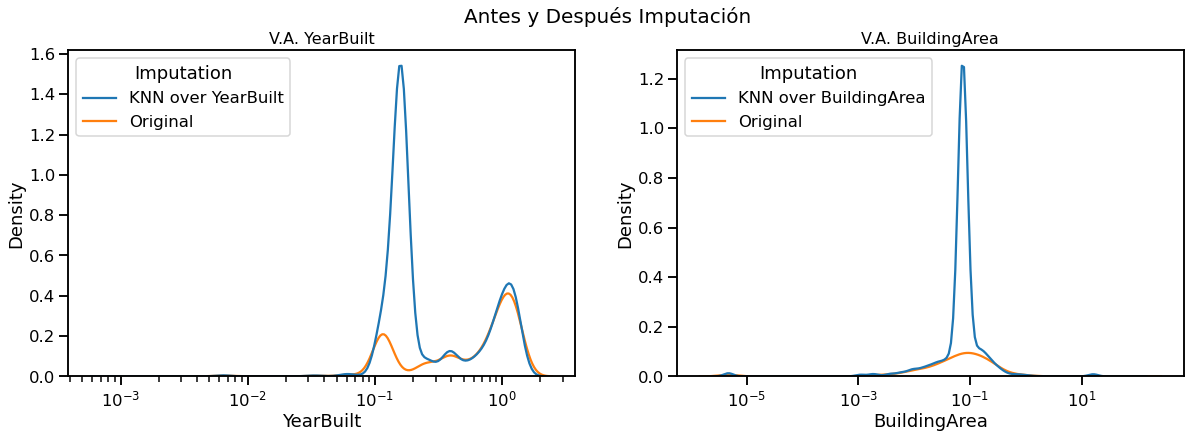

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
g = sns.kdeplot(data=data_yb, x='YearBuilt', hue='Imputation', ax=ax[0], log_scale=True)
sns.kdeplot(data=data_ba, x='BuildingArea', hue='Imputation', ax=ax[1], log_scale=True)
ax[0].set_title('V.A. YearBuilt', fontsize=16)
ax[1].set_title('V.A. BuildingArea', fontsize=16)

plt.suptitle('Antes y Después Imputación', fontsize=20)
plt.show()

In [31]:
melb_data_mice_f = pd.concat([melb_df_knn_f.drop(columns=cols), melb_data_mice], axis=1)
melb_data_mice_f.head()

,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,...,AgeRange=[>70),Rooms,Distance,Bathroom,Car,Landsize,price_mean_city,Price,YearBuilt,BuildingArea
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.953310,-1.302287,-0.761066,-0.613287,-0.210337,1.191846,1.100977,0.159575,0.074169
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.953310,-1.302287,-0.761066,-1.672578,-0.241041,1.191846,0.118436,-1.799241,-0.119382
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.124540,-1.302287,0.803824,-1.672578,-0.255726,1.191846,1.067857,-1.799241,0.009049
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.124540,-1.302287,0.803824,-0.613287,-0.282426,1.191846,-0.290035,0.159575,0.074169
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.202391,-1.302287,-0.761066,0.446005,-0.265071,1.191846,1.365931,1.319544,-0.005422


---

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Para la aplicación de PCA (Análisis de las Componentes Principales) es altamente recomendado aplicar una estandarización (o escalamiento) en los datos, ya que PCA mide la varianza entre las variables del datasets, y no sería correcto que esta medición se haga mezclando (conceptualmente) los datos.

Fuente: [Link](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

In [32]:
melb_data_mice_f.shape

(12956, 585)

In [85]:
# Los datos vienen escalados desde el ejercicio anterior
from sklearn.decomposition import PCA
n = min(20, melb_data_mice_f.shape[1])
pca = PCA(n_components=n)
melb_data_pca = pca.fit_transform(melb_data_mice_f)
exp_var = pca.explained_variance_ratio_
exp_var

array([0.17004327, 0.11108739, 0.09109122, 0.06846976, 0.05950626,
       0.04904078, 0.04704575, 0.02977322, 0.02673457, 0.0225151 ,
       0.0174728 , 0.01533271, 0.01276488, 0.0117692 , 0.01096891,
       0.01015935, 0.00922798, 0.00863768, 0.00824524, 0.00783229])

In [86]:
variance=np.cumsum(np.round(pca.explained_variance_ratio_, 5)*100)
variance

array([17.004, 28.113, 37.222, 44.069, 50.02 , 54.924, 59.629, 62.606,
       65.279, 67.531, 69.278, 70.811, 72.087, 73.264, 74.361, 75.377,
       76.3  , 77.164, 77.989, 78.772])

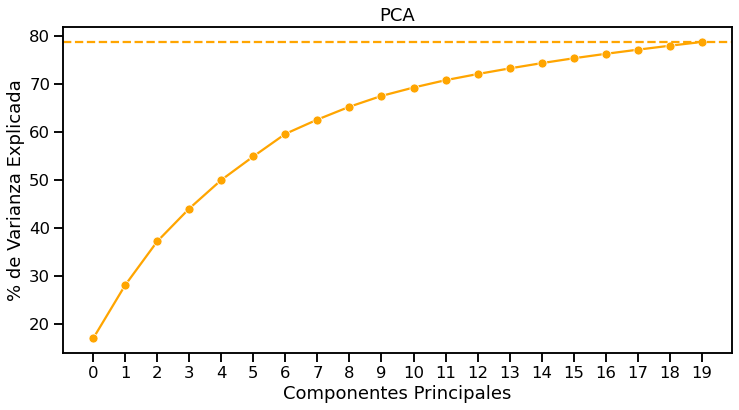

In [87]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(pca.n_components), y=variance, marker='o', color='orange')
plt.axhline(max(variance), linestyle = '--', color = 'orange', mew = 5)
plt.ylabel('% de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('PCA')

plt.xticks(range(pca.n_components))
plt.show()

Elegimos elegir las primeras 20 componentes del resultado arrojado por PCA. Estas explican un 78.77% de nuestro dataset, lo cual, creemos que es un número bastante alto.

In [89]:
pca_cols = [f'pca_{x}' for x in range(pca.n_components)]
melb_df_pca = pd.DataFrame(data=melb_data_pca,columns=pca_cols)
melb_df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19
0,-1.314192,1.782201,0.041559,-0.185371,0.130311,0.118109,0.358294,-0.873668,-0.988150,-0.315298,-0.821706,-0.370417,-0.080868,-0.120653,0.003592,0.110823,-0.022919,0.058335,0.007709,0.042009
1,-2.158732,2.016057,0.007147,-1.144087,0.686659,-0.429770,-0.696072,1.136631,-0.555495,-0.306271,-0.280593,-0.262476,-0.028546,-0.072195,-0.062789,0.593085,-0.604729,0.235926,-0.059574,-0.205773
2,-0.496598,2.825618,-0.204234,-0.999836,0.329184,0.152994,-1.334698,1.185607,-0.464490,-0.455466,-0.440738,-0.068266,0.769495,0.172348,-0.420083,-0.278079,-0.053504,-0.038908,-0.109597,0.053909
3,-0.503248,1.298930,-0.144550,0.301240,-0.513439,0.912626,-0.307320,0.320779,-1.229697,-0.136878,-0.651302,0.620192,0.512940,0.036129,-0.401293,-0.173425,-0.232671,-0.469109,-0.261184,0.153339
4,0.380038,1.612978,-0.373544,0.167665,-0.192576,0.542490,0.801776,-1.134388,-1.788970,0.103009,1.082140,-0.724758,-0.053700,-0.055642,-0.033875,0.559731,-0.572111,0.341720,-0.167529,-0.181609


In [90]:
melb_df_pca_f = pd.concat([melb_data_mice_f, melb_df_pca], axis=1)
melb_df_pca_f.head()

,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,...,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.821706,-0.370417,-0.080868,-0.120653,0.003592,0.110823,-0.022919,0.058335,0.007709,0.042009
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.280593,-0.262476,-0.028546,-0.072195,-0.062789,0.593085,-0.604729,0.235926,-0.059574,-0.205773
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440738,-0.068266,0.769495,0.172348,-0.420083,-0.278079,-0.053504,-0.038908,-0.109597,0.053909
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.651302,0.620192,0.512940,0.036129,-0.401293,-0.173425,-0.232671,-0.469109,-0.261184,0.153339
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.082140,-0.724758,-0.053700,-0.055642,-0.033875,0.559731,-0.572111,0.341720,-0.167529,-0.181609


---

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
